In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
%matplotlib inline
pd.set_option('display.max_columns', None)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [3]:
fraud_counts = df[df['is_fraud'] == 1].groupby('cc_num').size().reset_index(name='fraud_count')

In [4]:
fraud_counts

,cc_num,fraud_count
0,60416207185,9
1,60422928733,12
2,60423098130,10
3,60427851591,14
4,60490596305,10
...,...,...
757,4911818930706644725,9
758,4956828990005111019,10
759,4973530368125489546,10
760,4980323467523543940,10


In [5]:
fraud_counts_sorted = fraud_counts.sort_values(by='fraud_count', ascending=False).reset_index(drop=True)
fraud_counts_sorted

,cc_num,fraud_count
0,3520550088202337,19
1,4593569795412,19
2,4260128500325,18
3,30074693890476,16
4,2720433095629877,16
...,...,...
757,6011109736646996,2
758,4503101193493052864,2
759,3576431665303017,2
760,4089096483689733451,2


In [6]:
fraud_counts_sorted[fraud_counts_sorted["cc_num"] == 3520550088202337].fraud_count

0    19
Name: fraud_count, dtype: int64

In [7]:
prop = []
for cc in fraud_counts_sorted["cc_num"]:
    fr = fraud_counts_sorted[fraud_counts_sorted["cc_num"] == cc].fraud_count.values[0]
    tot = len(df[df["cc_num"] == cc])
    # print(tot)
    prop.append(fr/tot)
    # break
len(prop)

762

In [8]:
def calculate_variance(data, mean):
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)  # Sample variance uses (n-1)

def calculate_standard_deviation(data, mean):
    variance = calculate_variance(data, mean)
    return variance ** 0.5 

In [9]:
xbar = sum(prop)/len(prop)
sig = calculate_standard_deviation(prop, xbar)
z = (xbar-0.05)/(sig/math.sqrt(len(prop)))
print("Z-stat:", z)
print("Critical val: ", 1.64)
print("alpha: ", 0.05)
if z>1.64:
    print("Reject the null: number of frauds with each person is greater than 5%")
else:
    print("acccept the null: number of frauds with each person is less than 5%")
# p_value_right_tail = 1 - norm.cdf(z_statistic)
# print(p_value_right_tail)

Z-stat: 5.328626683882843
Critical val:  1.64
alpha:  0.05
Reject the null: number of frauds with each person is greater than 5%


In [10]:
xbar # avg number of frauds with each person

0.10700548957377287

In [11]:
from scipy.stats import anderson

# Sample data
data = prop

result = anderson(data, dist='norm')

print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values[2])

# for i in range(len(result.critical_values)):
sig_level = result.significance_level[2]
crit_value = result.critical_values[2]
if result.statistic > crit_value:
    print(f"At the {sig_level}% significance level, the data looks normal.")
else:
    print(f"At the {sig_level}% significance level, the data does not look normal.")


Anderson-Darling Test Statistic: 240.3774876045395
Critical Values: 0.783
At the 5.0% significance level, the data looks normal.


In [12]:
from scipy.stats import anderson

data = [74, 1931, 1904, 635, 658, 625, 609, 46, 60, 40, 56, 49, 47, 40, 42, 67, 80, 86, 79, 76, 78, 81, 81, 62]

result = anderson(data, dist='norm')

print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values[2])
print("Significance Levels:", result.significance_level[2])

sig_level = result.significance_level[2]
crit_value = result.critical_values[2]
if result.statistic > crit_value:
    print(f"At the {sig_level}% significance level, the data looks normal.")
else:
    print(f"At the {sig_level}% significance level, the data does not look normal.")


Anderson-Darling Test Statistic: 4.625310442787946
Critical Values: 0.701
Significance Levels: 5.0
At the 5.0% significance level, the data looks normal.


In [13]:
from scipy.stats import mannwhitneyu
alpha = 0.05
# Sample data for two independent groups
x1 = [74, 1931, 1904, 635, 658, 625, ]
x2 = [609, 46, 60, 40, 56, 49, 47, 40, 42, 67, 80, 86, 79, 76, 78, 81, 81, 62]

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(x1, x2, alternative='two-sided')

alpha_val=alpha
# Display results
# print(f"Mann-Whitney U Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > alpha_val:
    print("Reject null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the two groups.")


P-value: 0.0024
Fail to reject null hypothesis: There is no significant difference between the two groups.


In [14]:
# check_normality(prop, "props")

In [15]:
df = df.merge(fraud_counts, on='cc_num', how='left')

In [16]:
df["fraud_count"].fillna(0, inplace=True)

/tmp/ipykernel_17/1972271282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fraud_count"].fillna(0, inplace=True)


In [17]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,fraud_count
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,15.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,9.0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,8.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,11.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,8.0


****Exploratory Data Analysis****

In [18]:
# An overview of all the columns and their values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [19]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,fraud_count
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,15.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0.0


In [20]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'fraud_count'],
      dtype='object')

In [21]:
# Printing the unique values for each column

cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

Unnamed: 0 : 1296675
trans_date_trans_time : 1274791
cc_num : 983
merchant : 693
category : 14
amt : 52928
first : 352
last : 481
gender : 2
street : 983
city : 894
state : 51
zip : 970
lat : 968
long : 969
city_pop : 879
job : 494
dob : 968
trans_num : 1296675
unix_time : 1274823
merch_lat : 1247805
merch_long : 1275745
is_fraud : 2


In [22]:
# Removing redundant and/or unnecessary columns early to make EDA easier

df.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)

In [23]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_count
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,15.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0.0


In [24]:
# Checking for the imbalance in the data

df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [25]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,fraud_count
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,7.436529e+00
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,5.099960e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,2.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,8.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,1.100000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,1.900000e+01


In [26]:
df.amt.value_counts()

amt
1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
334.21       1
674.31       1
358.59       1
1159.68      1
255.52       1
Name: count, Length: 52928, dtype: int64

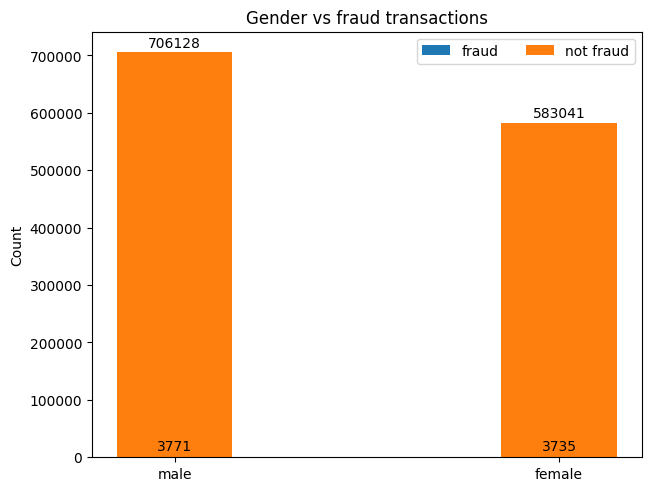

In [27]:
# df[df['category', 'gender', 'state', 'is_fraud']]
# cols = ['category', 'gender', 'state', 'is_fraud']
# data = df[cols]
# sns.heatmap(data, annot = True)
gender = ["male", 'female']
fraud_count = {
    'fraud': {3771, 3735},
    'not fraud' : {706128, 583041}
}

x = np.arange(len(gender))
width = 0.3
mult = 0

fig, ax = plt.subplots(layout = 'constrained')
for attr, val in fraud_count.items():
    offset = mult * width
    rects = ax.bar(x + width, val, width, label = attr)
    ax.bar_label(rects, padding = 1.5)
    mult += 1
    
    
ax.set_ylabel("Count")
ax.set_xticks(width + x, gender)
ax.set_title("Gender vs fraud transactions")
ax.legend(ncols = 2)
plt.show()
    
# df[df.is_fraud == 0].gender.value_counts()
# fraud = [3771, 3735]
# not_fraud = [706128, 583041]
# # fraud.append(df[df.is_fraud == 1].gender.value_counts())
# # fraud
# plt.bar(fraud, color = 'red')
# plt.bar(not_fraud, color = 'green')
# plt.show()

In [28]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'fraud_count'],
      dtype='object')

In [29]:
# Date time analysis

def date_time_analysis(df):
#     newdf = df.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    
    df['transact_hour'] = df['trans_date_trans_time'].dt.hour
    df['transact_mth'] = df['trans_date_trans_time'].dt.month
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# newdf = df.copy()
date_time_analysis(df)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_count,transact_hour,transact_mth,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0.0,0,1,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0.0,0,1,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0.0,0,1,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,15.0,0,1,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0.0,0,1,33


Time Analysis

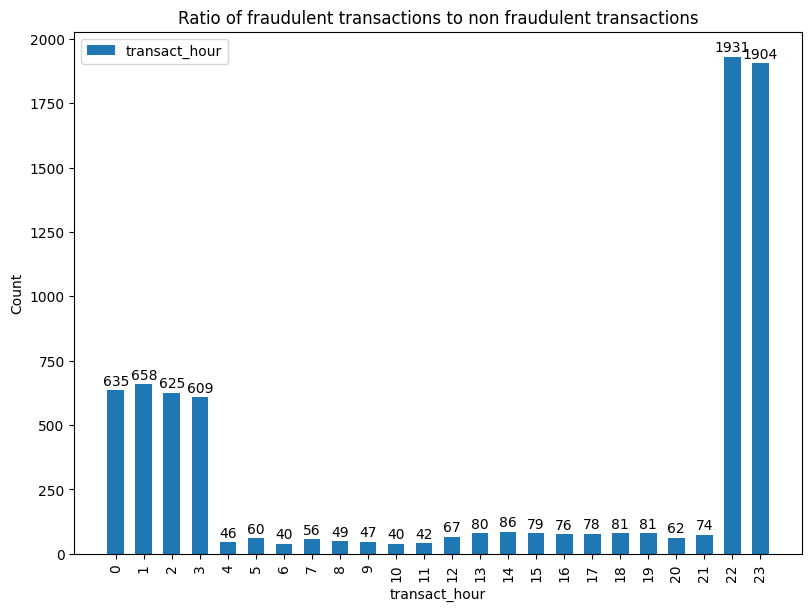

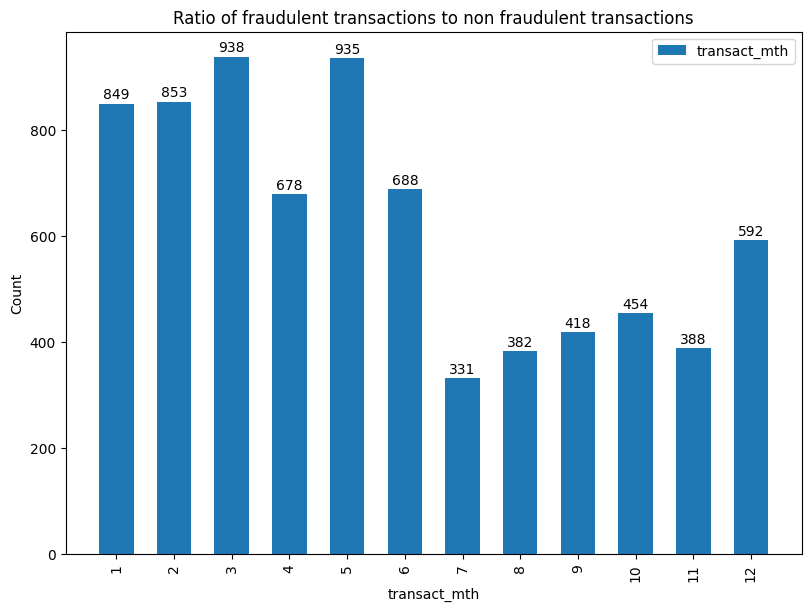

In [30]:
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()
    
    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_ratio, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    ax.legend(ncols=2)
    plt.show()

columns = ['transact_hour', 'transact_mth']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

In [31]:
region_boundaries = {
    'NewEngland': {'lat_range': (40, 47), 'long_range': (-74, -66)},
    'NY_NJ_PuertoRico_VirginIslands': {'lat_range': (17, 45), 'long_range': (-80, -65)},
    'MidAtlantic': {'lat_range': (36, 42), 'long_range': (-83, -74)},
    'Southeast': {'lat_range': (24, 39), 'long_range': (-91, -75)}, 
    'Midwest': {'lat_range': (36, 49), 'long_range': (-93, -80)},  
    'SouthCentral': {'lat_range': (25, 37), 'long_range': (-106, -89)}, 
    'Plains': {'lat_range': (36, 43), 'long_range': (-102, -89)},
    'Mountain': {'lat_range': (37, 49), 'long_range': (-114, -102)}, 
    'WestCoast_PacificIslands': {'lat_range': (13, 42), 'long_range': (-160, -105)},
    'Northwest_Alaska': {'lat_range': (42, 72), 'long_range': (-150, -110)}
}

def get_region_by_lat_long(lat, long):
    for region, bounds in region_boundaries.items():
        lat_min, lat_max = bounds['lat_range']
        long_min, long_max = bounds['long_range']
        if lat_min <= lat <= lat_max and long_min <= long <= long_max:
            return region
    return "Outside US"

df['cust_loc'] = df.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
df['merch_loc'] = df.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

Geographic analysis

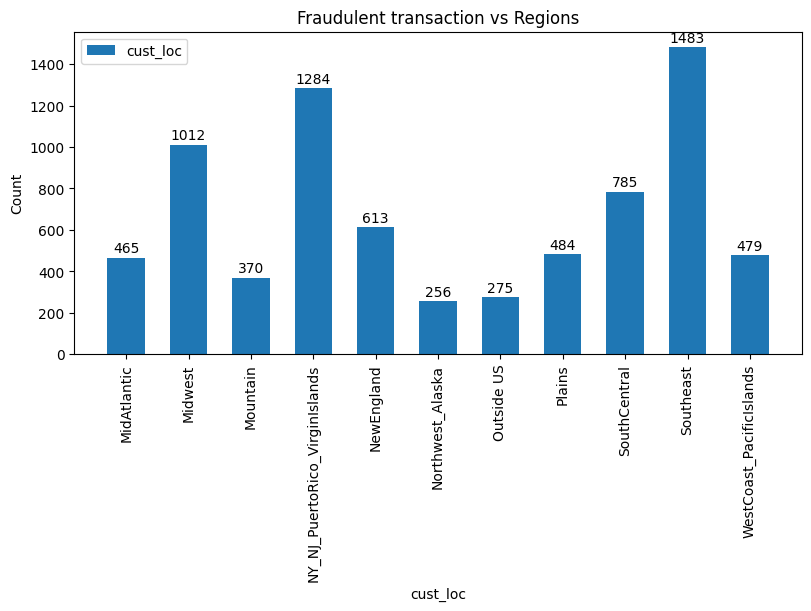

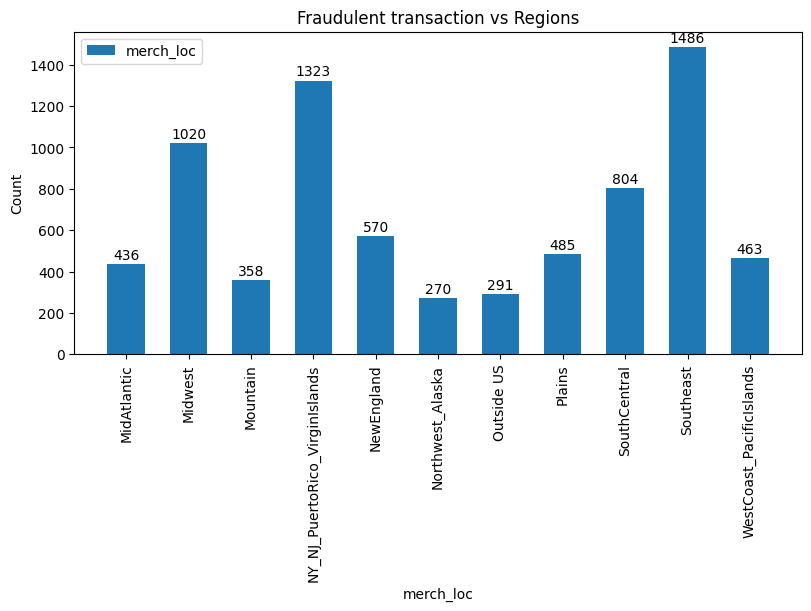

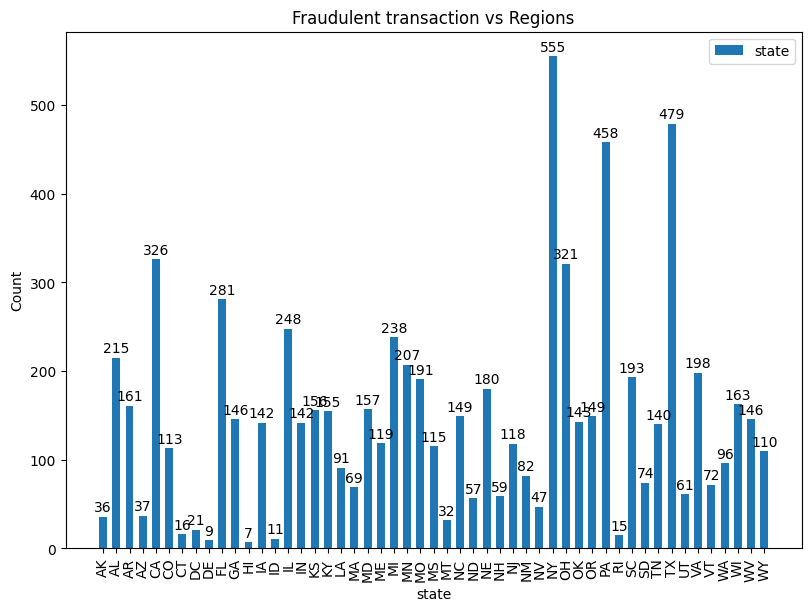

In [32]:
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_count = fraud_df.groupby(column).size()
    
    categories = fraud_count.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_count, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Fraudulent transaction vs Regions")
    ax.legend(ncols=2)
    plt.show()

columns = ['cust_loc', 'merch_loc', 'state']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

Demographic Analysis

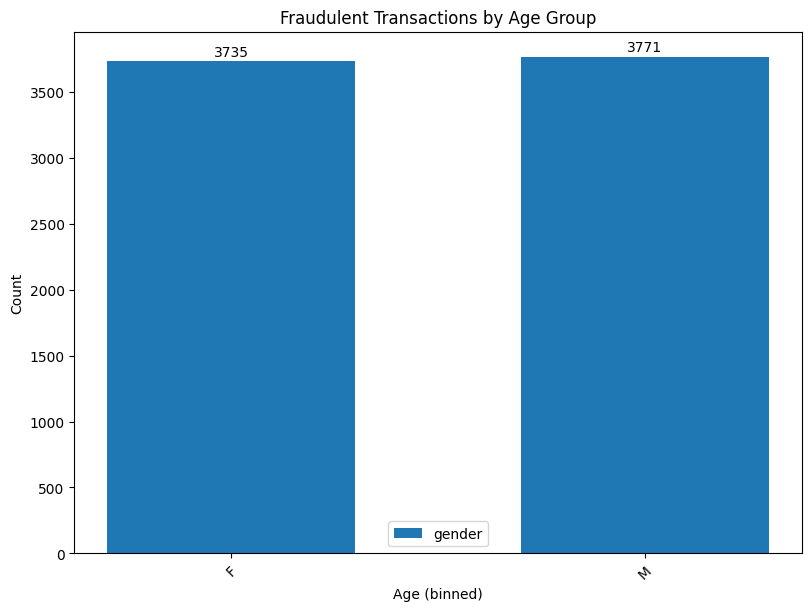

/tmp/ipykernel_17/2673330563.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_count = fraud_df.groupby(column).size()


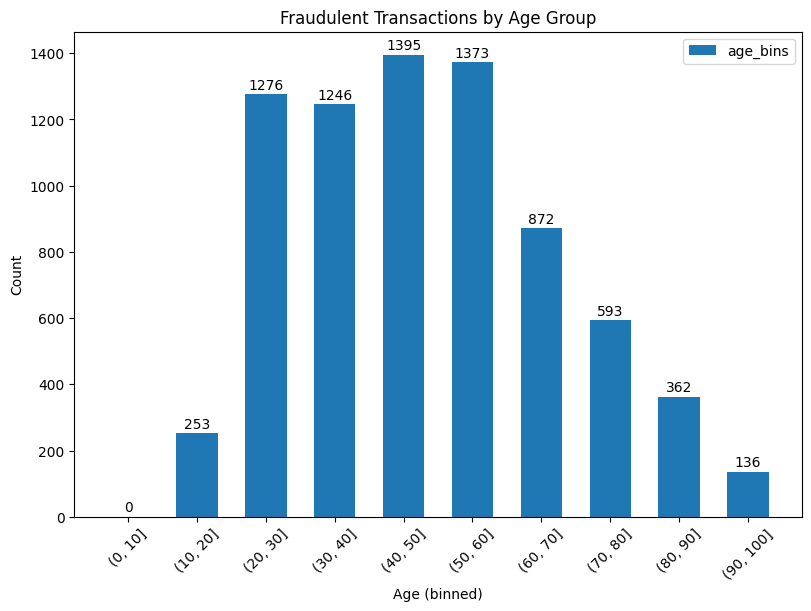

In [33]:
def plot_fraud_counts_by_column(df, column, bin_size=10):
    if column == 'age':
        df['age_bins'] = pd.cut(df['age'], bins=range(0, df['age'].max() + bin_size, bin_size))
        column = 'age_bins'

    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_count = fraud_df.groupby(column).size()
    
    categories = fraud_count.index
    x = np.arange(len(categories))
    width = 0.6
    
    fig, ax = plt.subplots(layout='constrained', figsize=(8, 6))
    rects = ax.bar(x, fraud_count, width, label=column)
    ax.bar_label(rects, padding=1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.set_xlabel("Age (binned)")
    ax.set_title("Fraudulent Transactions by Age Group")
    ax.legend(ncols=2)
    plt.show()

columns = ['gender', 'age']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

**Data Preprocessing**

In [34]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'fraud_count', 'transact_hour',
       'transact_mth', 'age', 'cust_loc', 'merch_loc', 'age_bins'],
      dtype='object')

In [35]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_count,transact_hour,transact_mth,age,cust_loc,merch_loc,age_bins
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0.0,0,1,31,MidAtlantic,MidAtlantic,"(30, 40]"
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0.0,0,1,41,Northwest_Alaska,Northwest_Alaska,"(40, 50]"
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0.0,0,1,57,Mountain,Mountain,"(50, 60]"
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,15.0,0,1,52,Mountain,Mountain,"(50, 60]"
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0.0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands,"(30, 40]"


In [36]:
def bucketize_transact_hour(hour):
    if (22 <= hour <= 23) or (0 <= hour <= 3):
        return "10 PM to 3 AM"
    else:
        return "4 AM to 9 PM"

df['transact_hour_bucket'] = df['transact_hour'].apply(bucketize_transact_hour)

def plot_fraud_counts_by_column(df, column):
    hours_in_bucket = {
        "10 PM to 3 AM": 6,
        "4 AM to 9 PM": 18
    }
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()
    fraud_ratio_hourly = fraud_ratio / fraud_ratio.index.map(hours_in_bucket)
    
    
    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    # fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    # rects = ax.bar(x, fraud_ratio_hourly, width, label = column)
    # ax.bar_label(rects, padding = 1.5)

    # ax.set_ylabel("Count")
    # ax.set_xticks(x)
    # ax.set_xticklabels(categories, rotation=90)
    # ax.set_xlabel(column)
    # ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    # ax.legend(ncols=2)
    # plt.show()

columns = ['transact_hour_bucket', 'transact_mth']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()
    
    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    # print(fraud_ratio)
    # fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    # rects = ax.bar(x, fraud_ratio, width, label = column)
    # ax.bar_label(rects, padding = 1.5)

    # ax.set_ylabel("Count")
    # ax.set_xticks(x)
    # ax.set_xticklabels(categories, rotation=90)
    # ax.set_xlabel(column)
    # ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    # ax.legend(ncols=2)
    # plt.show()
    return fraud_ratio

fraud_ratio = plot_fraud_counts_by_column(df, 'transact_hour')

In [37]:
def calculate_variance(data, mean):
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)  # Sample variance uses (n-1)

def calculate_standard_deviation(data, mean):
    variance = calculate_variance(data, mean)
    return variance ** 0.5 

In [38]:
fraud_ratio.values

array([ 635,  658,  625,  609,   46,   60,   40,   56,   49,   47,   40,
         42,   67,   80,   86,   79,   76,   78,   81,   81,   62,   74,
       1931, 1904])

In [39]:
x1bar = 6362/6
x2bar = 1144/18
s1 = calculate_standard_deviation([74,1931, 1904, 635,  658,  625], x1bar)
s2 = calculate_standard_deviation([609,   46,   60,   40,   56,   49,   47,   40,42,   67,   80,   86,   79,   76,   78,   81,   81,   62], x1bar)
s = (((5*(s1**2))+(17*(s2**2)))/22)**0.5
# s
m = x1bar-x2bar
denom = s*((0.1666666+0.0555555)**0.5)
t = m/denom

In [40]:
from scipy import stats
p_value_one_tailed = 1 - stats.t.cdf(t, 22)

p_value_two_tailed = 2 * p_value_one_tailed

# print(f"One-tailed P-value: {p_value_one_tailed:.4f}")
print(f"P-value: {p_value_two_tailed:.4f}")
print(f"T stat: {t:.4f}")
if p_value < 0.05:
    print("Reject null: which means there is a difference between transactions during day and night")
else:
    print("Accept null: not significant diff")

P-value: 0.0376
T stat: 2.2125
Reject null: which means there is a difference between transactions during day and night


In [41]:
# In our data we have geographical data in form of both coordinates and city/state location.
# So we can choose either of them to work with
# However as the latitude and longitude data gives us more information, we will keep it and remove street, city and state data 
# as it is redundant
# Additionally we drop columns that are redundant or from which we have already extracted relevant data or one which simply
# has too many unique values for us to resonably handle

df.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)

In [42]:
df.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,fraud_count,transact_hour,transact_mth,age,cust_loc,merch_loc,age_bins,transact_hour_bucket
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,"Psychologist, counselling",0,0.0,0,1,31,MidAtlantic,MidAtlantic,"(30, 40]",10 PM to 3 AM
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,Special educational needs teacher,0,0.0,0,1,41,Northwest_Alaska,Northwest_Alaska,"(40, 50]",10 PM to 3 AM
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,4154,Nature conservation officer,0,0.0,0,1,57,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,Patent attorney,0,15.0,0,1,52,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,99,Dance movement psychotherapist,0,0.0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands,"(30, 40]",10 PM to 3 AM


In [43]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city_pop', 'job',
       'is_fraud', 'fraud_count', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc', 'age_bins', 'transact_hour_bucket'],
      dtype='object')

In [44]:
cols = ['cc_num', 'merchant', 'category', 'amt', 'gender',
       'city_pop', 'job', 'is_fraud', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc']

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

cc_num : 983
merchant : 693
category : 14
amt : 52928
gender : 2
city_pop : 879
job : 494
is_fraud : 2
transact_hour : 24
transact_mth : 12
age : 83
cust_loc : 11
merch_loc : 11


In [45]:
df.describe()

,cc_num,amt,city_pop,is_fraud,fraud_count,transact_hour,transact_mth,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,8.882444e+04,5.788652e-03,7.436529e+00,1.280486e+01,6.142150e+00,4.602930e+01
std,1.308806e+18,1.603160e+02,3.019564e+05,7.586269e-02,5.099960e+00,6.817824e+00,3.417703e+00,1.738237e+01
min,6.041621e+10,1.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
25%,1.800429e+14,9.650000e+00,7.430000e+02,0.000000e+00,2.000000e+00,7.000000e+00,3.000000e+00,3.300000e+01
50%,3.521417e+15,4.752000e+01,2.456000e+03,0.000000e+00,8.000000e+00,1.400000e+01,6.000000e+00,4.400000e+01
75%,4.642255e+15,8.314000e+01,2.032800e+04,0.000000e+00,1.100000e+01,1.900000e+01,9.000000e+00,5.700000e+01
max,4.992346e+18,2.894890e+04,2.906700e+06,1.000000e+00,1.900000e+01,2.300000e+01,1.200000e+01,9.600000e+01


In [46]:
newdf = df.copy()
# cc_perc = newdf['cc_num'].value_counts(normalize = True) * 100
# newdf['cc_perc'] = newdf['cc_num'].map(cc_perc)
# # len(newdf['cc_perc'].unique())
# newdf['cc_perc']

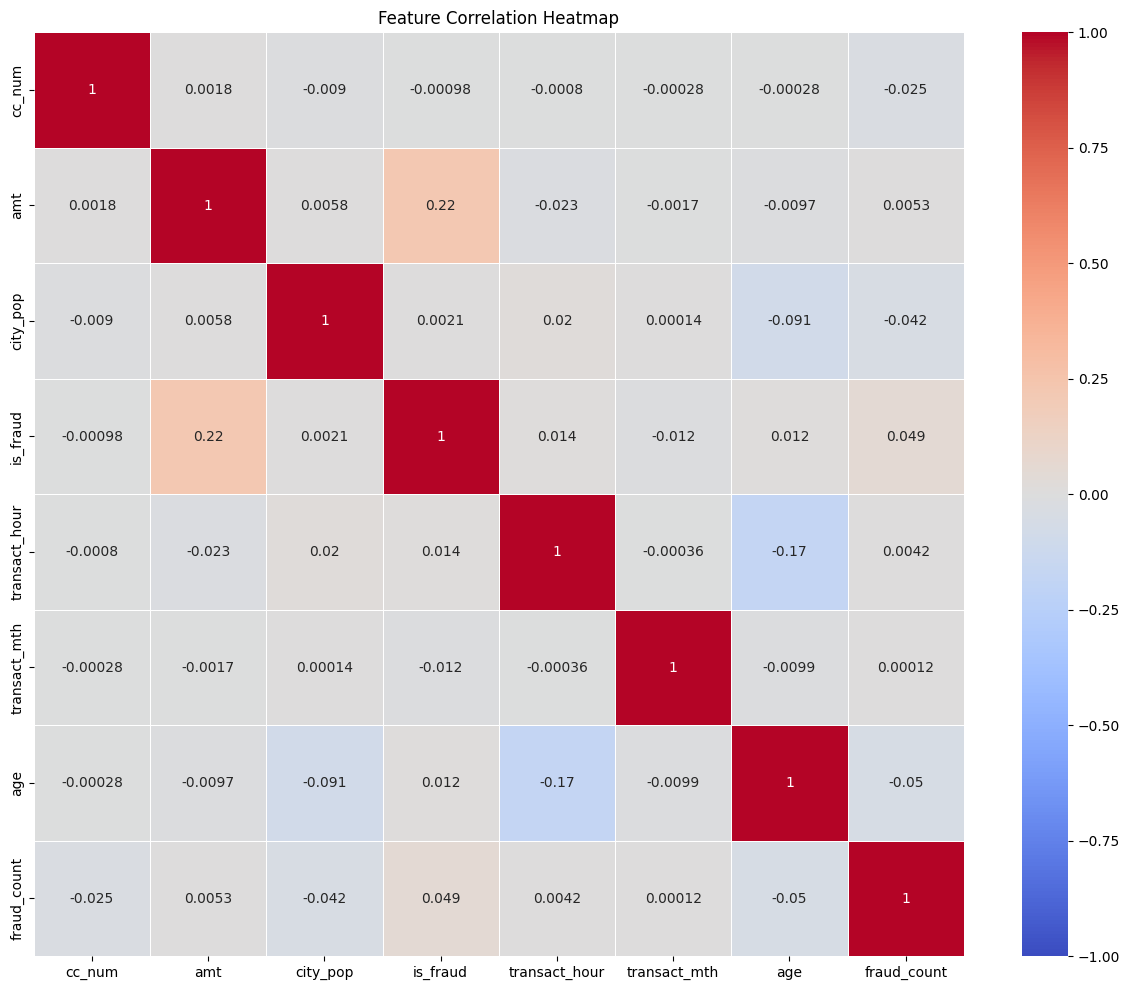

In [47]:
correlation_matrix = df[['cc_num', 'amt', 'city_pop', 'is_fraud',
       'transact_hour', 'transact_mth', 'age', 'fraud_count']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [48]:
def percentage_encode(df, col):
    normalized_count = df[col].value_counts(normalize = True) * 100
    df[col] = df[col].map(normalized_count)
    
cols = ['cc_num', 'merchant', 'city_pop', 'job']
# percentage_encode(newdf, cols)
for col in cols:
    percentage_encode(newdf, col)

In [49]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   cc_num                1296675 non-null  float64 
 1   merchant              1296675 non-null  float64 
 2   category              1296675 non-null  object  
 3   amt                   1296675 non-null  float64 
 4   gender                1296675 non-null  object  
 5   city_pop              1296675 non-null  float64 
 6   job                   1296675 non-null  float64 
 7   is_fraud              1296675 non-null  int64   
 8   fraud_count           1296675 non-null  float64 
 9   transact_hour         1296675 non-null  int32   
 10  transact_mth          1296675 non-null  int32   
 11  age                   1296675 non-null  int32   
 12  cust_loc              1296675 non-null  object  
 13  merch_loc             1296675 non-null  object  
 14  age_bins          

In [50]:
newdf.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,fraud_count,transact_hour,transact_mth,age,cust_loc,merch_loc,age_bins,transact_hour_bucket
0,0.156400,0.097711,misc_net,4.97,F,0.156400,0.273392,0,0.0,0,1,31,MidAtlantic,MidAtlantic,"(30, 40]",10 PM to 3 AM
1,0.233675,0.193032,grocery_pos,107.23,F,0.234446,0.393237,0,0.0,0,1,41,Northwest_Alaska,Northwest_Alaska,"(40, 50]",10 PM to 3 AM
2,0.038792,0.146143,entertainment,220.11,M,0.038792,0.039408,0,0.0,0,1,57,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
3,0.038020,0.201515,gas_transport,45.00,M,0.038020,0.195114,0,15.0,0,1,52,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
4,0.155552,0.122776,misc_pos,41.96,M,0.194189,0.155552,0,0.0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands,"(30, 40]",10 PM to 3 AM


In [51]:
def label_encoder(df, columns):
    for cols in columns:
        unique_values = df[cols].unique()
        name_to_num = {name: i for i, name in enumerate(unique_values)}
        df[cols] = df[cols].map(name_to_num).astype(int)
cols = ['gender']
label_encoder(newdf, cols)

In [52]:
newdf.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,fraud_count,transact_hour,transact_mth,age,cust_loc,merch_loc,age_bins,transact_hour_bucket
0,0.156400,0.097711,misc_net,4.97,0,0.156400,0.273392,0,0.0,0,1,31,MidAtlantic,MidAtlantic,"(30, 40]",10 PM to 3 AM
1,0.233675,0.193032,grocery_pos,107.23,0,0.234446,0.393237,0,0.0,0,1,41,Northwest_Alaska,Northwest_Alaska,"(40, 50]",10 PM to 3 AM
2,0.038792,0.146143,entertainment,220.11,1,0.038792,0.039408,0,0.0,0,1,57,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
3,0.038020,0.201515,gas_transport,45.00,1,0.038020,0.195114,0,15.0,0,1,52,Mountain,Mountain,"(50, 60]",10 PM to 3 AM
4,0.155552,0.122776,misc_pos,41.96,1,0.194189,0.155552,0,0.0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands,"(30, 40]",10 PM to 3 AM


In [53]:
def onehotencode(df, columns):
#     df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)        
    return df

columns = ['category', 'cust_loc', 'merch_loc']
newdf = onehotencode(newdf, columns)

In [54]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 49 columns):
 #   Column                                    Non-Null Count    Dtype   
---  ------                                    --------------    -----   
 0   cc_num                                    1296675 non-null  float64 
 1   merchant                                  1296675 non-null  float64 
 2   amt                                       1296675 non-null  float64 
 3   gender                                    1296675 non-null  int64   
 4   city_pop                                  1296675 non-null  float64 
 5   job                                       1296675 non-null  float64 
 6   is_fraud                                  1296675 non-null  int64   
 7   fraud_count                               1296675 non-null  float64 
 8   transact_hour                             1296675 non-null  int32   
 9   transact_mth                              1296675 non-null  int32   

In [55]:
newdf

,cc_num,merchant,amt,gender,city_pop,job,is_fraud,fraud_count,transact_hour,transact_mth,age,age_bins,transact_hour_bucket,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,cust_loc_MidAtlantic,cust_loc_Midwest,cust_loc_Mountain,cust_loc_NY_NJ_PuertoRico_VirginIslands,cust_loc_NewEngland,cust_loc_Northwest_Alaska,cust_loc_Outside US,cust_loc_Plains,cust_loc_SouthCentral,cust_loc_Southeast,cust_loc_WestCoast_PacificIslands,merch_loc_MidAtlantic,merch_loc_Midwest,merch_loc_Mountain,merch_loc_NY_NJ_PuertoRico_VirginIslands,merch_loc_NewEngland,merch_loc_Northwest_Alaska,merch_loc_Outside US,merch_loc_Plains,merch_loc_SouthCentral,merch_loc_Southeast,merch_loc_WestCoast_PacificIslands
0,0.156400,0.097711,4.97,0,0.156400,0.273392,0,0.0,0,1,31,"(30, 40]",10 PM to 3 AM,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.233675,0.193032,107.23,0,0.234446,0.393237,0,0.0,0,1,41,"(40, 50]",10 PM to 3 AM,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.038792,0.146143,220.11,1,0.038792,0.039408,0,0.0,0,1,57,"(50, 60]",10 PM to 3 AM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.038020,0.201515,45.00,1,0.038020,0.195114,0,15.0,0,1,52,"(50, 60]",10 PM to 3 AM,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.155552,0.122776,41.96,1,0.194189,0.155552,0,0.0,0,1,33,"(30, 40]",10 PM to 3 AM,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0.116683,0.147068,15.56,1,0.234292,0.433416,0,9.0,12,6,59,"(50, 60]",4 AM to 9 PM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1296671,0.040951,0.135038,51.70,1,0.158714,0.040951,0,8.0,12,6,41,"(40, 50]",4 AM to 9 PM,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1296672,0.159639,0.142904,105.93,1,0.199433,0.669713,0,11.0,12,6,53,"(50, 60]",4 AM to 9 PM,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1296673,0.156092,0.147300,74.90,1,0.312954,0.156092,0,8.0,12,6,40,"(30, 40]",4 AM to 9 PM,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
newdf = newdf.drop(["age_bins", "transact_hour_bucket"], axis=1)

In [57]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
X = newdf.drop("is_fraud", axis=1)
y = newdf["is_fraud"]

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
start_time = time.time()
model = LogisticRegression(random_state=42, class_weight="balanced")  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    257834
           1       0.04      0.81      0.07      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.85      0.51    259335
weighted avg       0.99      0.88      0.93    259335

ROC-AUC Score: 0.9345993740287593
Time to train:  22.819072008132935


In [60]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
model = GaussianNB()  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257834
           1       0.04      0.68      0.08      1501

    accuracy                           0.90    259335
   macro avg       0.52      0.80      0.51    259335
weighted avg       0.99      0.90      0.94    259335

ROC-AUC Score: 0.8467726307766918
Time to train:  1.0745549201965332


In [61]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.989962066343943
Time to train:  194.52717804908752


In [62]:
import xgboost as xgb
start_time = time.time()
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
)
xgb_clf.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.96      0.82      0.89      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.91      0.94    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9984562238700733
Time to train:  11.66321063041687


In [63]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.81      0.84      0.83      1501

    accuracy                           1.00    259335
   macro avg       0.91      0.92      0.91    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9211584159859256
Time to train:  14.140877723693848


In [64]:
from scipy.sparse import random
import numpy as np

def sparse_jl_matrices(d, n, sparsity=0.1):
    rows = d
    cols = n
    scale = np.sqrt(1 / d)
    data_rvs = lambda size: np.random.normal(loc=0, scale=scale, size=size)
    matrix = random(rows, cols, density=sparsity, format='csr', data_rvs=data_rvs)
    matrix.data = np.sign(matrix.data) * np.sqrt(1 / sparsity)
    return matrix


In [65]:
n_features = X.shape[1]  # Original dimensionality
d_reduced = 38           # Target reduced dimensionality

# Generate sparse JL matrix
jl_matrix = sparse_jl_matrices(d_reduced, n_features)

# Reduce dimensions of X
X_reduced = X @ jl_matrix.T.toarray()

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (1296675, 46)
Reduced shape: (1296675, 38)


In [66]:
jl_matrix.shape

(38, 46)

In [67]:
X_train.shape, y_train.shape

((1037340, 46), (1037340,))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
start_time = time.time()
model = LogisticRegression(random_state=42, class_weight="balanced")  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.87      0.93    257834
           1       0.04      0.80      0.07      1501

    accuracy                           0.87    259335
   macro avg       0.52      0.84      0.50    259335
weighted avg       0.99      0.87      0.93    259335

ROC-AUC Score: 0.9127340411046018
Time to train:  22.217727422714233


In [70]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
model = GaussianNB()  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257834
           1       0.20      0.65      0.31      1501

    accuracy                           0.98    259335
   macro avg       0.60      0.82      0.65    259335
weighted avg       0.99      0.98      0.99    259335

ROC-AUC Score: 0.890076904549419
Time to train:  0.8168320655822754


In [71]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.96      0.77      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9899200595508887
Time to train:  435.5247712135315


In [72]:
import xgboost as xgb
start_time = time.time()
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
)
xgb_clf.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.96      0.78      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.996848164969795
Time to train:  8.319884538650513


In [73]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.80      0.83      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.90      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9121372627375219
Time to train:  40.206695318222046


In [74]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
n_components = 38  # Target number of dimensions
sparse = csr_matrix(X)
pca = TruncatedSVD(n_components=n_components)
X_reduced = pca.fit_transform(sparse)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
start_time = time.time()
model = LogisticRegression(random_state=42, class_weight="balanced")  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    257834
           1       0.04      0.81      0.07      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.85      0.51    259335
weighted avg       0.99      0.88      0.93    259335

ROC-AUC Score: 0.9313532827521968
Time to train:  18.55448293685913


In [76]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
model = GaussianNB()  # 'balanced' adjusts weights for imbalanced classes
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257834
           1       0.20      0.52      0.29      1501

    accuracy                           0.99    259335
   macro avg       0.60      0.75      0.64    259335
weighted avg       0.99      0.99      0.99    259335

ROC-AUC Score: 0.8615702206425604
Time to train:  0.7638223171234131


In [77]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.88      0.92    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9803141431650111
Time to train:  2171.617548942566


In [78]:
import xgboost as xgb
start_time = time.time()
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
)
xgb_clf.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.77      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.89      0.92    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9976226149917807
Time to train:  11.16767930984497


In [79]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Time to train: ", end_time-start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.78      0.78      0.78      1501

    accuracy                           1.00    259335
   macro avg       0.89      0.89      0.89    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.8894449732380012
Time to train:  185.16625356674194
